<center>
    <h1> Reconocimiento de patrones y aprendizaje automático</h1>
    <h1>Tarea 2: Métricas de clasificación</h1>
    <h2>González Alvarado Raúl : 313245312</h2>
</center>

## 1. Máquinas de soporte vectorial

### 1.a Describa detalladamente qué son y cómo funcionan las Máquinas de Soporte Vectorial (SVM).

Es un modelo con el que se puede hacer regresión, clasificación (lineal y no lineal) e identifación de outliers.
Recibe su nombre de los datos (vectores) que crean una "calle" que separa las clases entre sí, estos vectores "soportan" la calle para hacer una "buena" (puede ser soft margin o hard margin) separación.

### 1.b Describa el proceso de entrenamiento de una SVM.
Consiste en ir probando distintos datos (vectores) usando cross-validation, para encontrar los que mejor separen los datos según su clase. Se usa una función llamada Kernel, para encontrar qué tan relacionados están unos datos de otros.

### 1.c ¿Qué es el _kernel_ de una SVM?

Es una función que nos da la relación entre dos datos pero como si estuvieran en dimensiones más altas.

### 1.d ¿Cuáles son las ventajas y desventajas de usar kernels polinomiales de alto y bajo grado?

Con un grado muy alto podríamos tener un sobreajuste a nuestros datos y nuestro modelo no generalizará bien.
En cambio con grados bajos podemos obtener un bajo ajuste y necesitaremos aumentar el grado de nuestro polinomio.

### 1.e Explique detalladamente qué es el _kernel trick_.

Lo que se quiere durante el entrenamiento es encontrar la relación entre dos datos cualquiera del conjunto de entrenamiento. Para esta relación se usa el producto punto; pero como ya se mencionó, se usan kernels para transformar los datos a una dimensión más alta.

El problema surge en que si es una dimensión muy alta, entonces se tiene que calcular primero cada dato en las
dimensiones altas y luego calcular el producto punto de los dos datos involucrados.

El _kernel trick_ nos ayuda a saltarnos la transformación y simplemente calcular la relación entre dos puntos sin
moverlos a una dimensión mayor.

### 1.f Explique detalladamente el kernel basado en funciones de base radial gaussianas (Gaussina RBF Kernel).

Tiene la siguiente fórmula 
$$
K(a,b) = exp(-\gamma || a-b ||^2)
$$
Su objetivo es calcular la relación de los datos $a,b$ si los movieramos a dimensiones infinitas.

## 2. MNIST y regresión logística

El conjunto de datos MNIST contiene 70,000 imágenes de dígitos escritos a mano. Cada imágen de $28 \times 28$ píxeles está representada por un vector de 784 píxeles. Cada píxel puede tomar uno entre 256 tonos de gris, donde 0 es negro absoluto y 255 es blanco absoluto. Todos los vecotres tienen asociada una etiqueta que indica el dígito escrito en la imágen.

El objetivo de este ejercicio es construir un clasificador que permita identificar el dígito al que corresponde la información de cada imagen.

**2.a** Descargue el archivo de datos `mnist-original.mat` desde [Kaagle](https://www.kaggle.com/avnishnish/mnist-original) y agréguelo a su directorio raíz.

**2.b** Cargue los datos y etiquetas en python. El archivo `MNIST_load.ipynb` contiene un ejemplo de cómo cargar los datos de MNIST.

**2.c** Divida el conjunto de datos en Entrenamiento (50%), Calibración (20%) y Prueba (30%).

**2.d** Utilizando regresión logística, construya un clasificador para MNIST, para ello debe considerar un clasificador binario capaz de reconocer cada dígito. Use el conjunto de entrenemiento para entrenar cada sub-clasificador.

**2.e** Dado un clasificador que reconoce al dígito $i$, la regresión logística indica la probabilidad de que los datos de entrada $x$ pertenezcan a la clase $i$, $P_i(x)$. 
Dado un umbral de probabilidad $\theta_i$, se considera que $x$ pertenece a la clase $i$ si $P_i(x) \geq \theta_i$.
Use el conjunto de calibración para evaluar el rendimiento de cada clasificador y determinar el umbral $\theta_i$ que hace el mejor compromiso entre la taza de verdaderos positivos y la taza de falsos positivos.
Para ello, en cada clasificador:

1. Calcule una matriz de confusión usando los datos de calibración.
2. A partir de la matriz de confunsión, grafique en un solo panel las curvas de Precisión y Recall en función del umbral (al menos 100 valores).
3. Grafique una curva ROC mostrando el compromiso entre TPR y FPR para cada valor del umbral (al menos 100 valores).
4. Obtenga el valor del umbral que simultáneamente maximice la TPR y minimice la FPR.

**2.f** Evalúe el rendimiento del clasificador MNIST completo usando los datos de prueba:
1. Obtenga la matriz de confusión final para el clasificador MNIST considerando las 10 clases.
2. Calcule las métricas Micro-F1, Macro-F1, Weighted F1 y Average Accuracy del sistema.

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.b Carga de datos
Cargue los datos y etiquetas en python. El archivo `MNIST_load.ipynb` contiene un ejemplo de cómo cargar los datos de MNIST.

In [2]:
mnist = scipy.io.loadmat("mnist-original.mat")
data = mnist["data"].T
labels = mnist["label"][0]

In [3]:
# Revisando los tamaños de cada conjunto
print(data.shape)
data[:5]

(70000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
print(labels.shape)
labels

(70000,)


array([0., 0., 0., ..., 9., 9., 9.])

In [5]:
# Revisando las categorías que hay
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

In [6]:
df = np.hstack((data, mnist["label"].T))
df = pd.DataFrame(df)

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: 784, dtype: int64

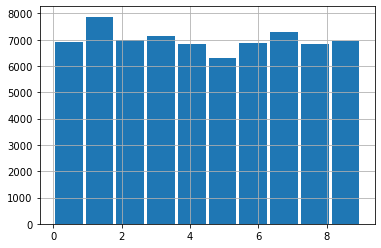

In [7]:
# Revisando la cantidad de datos en cada clase
df[784].hist(rwidth=0.9)
df[784].value_counts()

In [8]:
def plot(data, size=5):
    """
    Grafica las imágenes de los primeros 25 elementos en data
    """
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1].to_numpy()
    data_reshape = X.to_numpy().reshape(len(X), 28, 28)
    plt.figure(figsize=(size*2,size*2))
    for i in range(size**2):
        plt.subplot(size,size,i+1)
        plt.imshow(data_reshape[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y[i])
    plt.show()

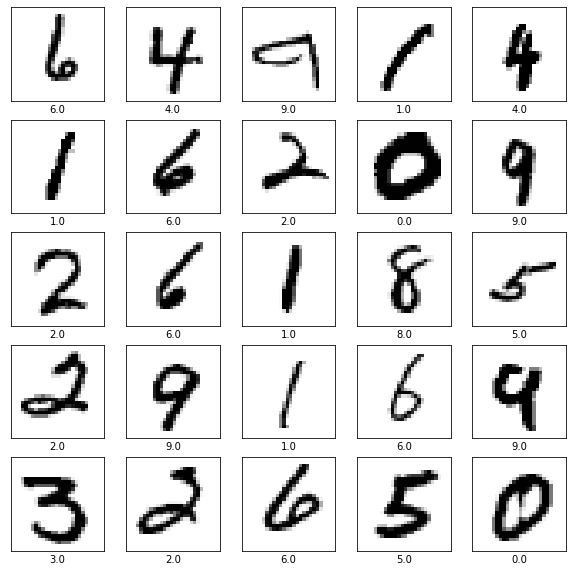

In [9]:
# Muestra elementos aleatorios
plot(df.sample(frac=1))

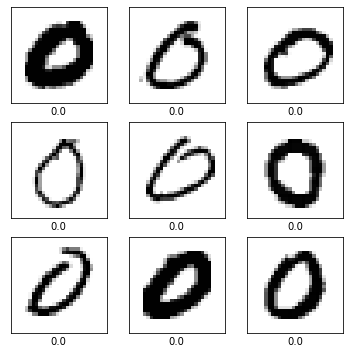

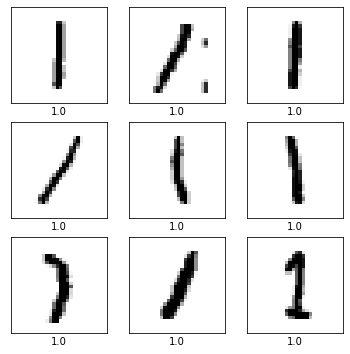

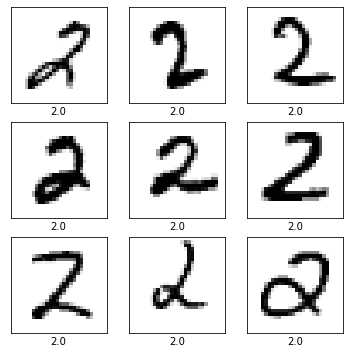

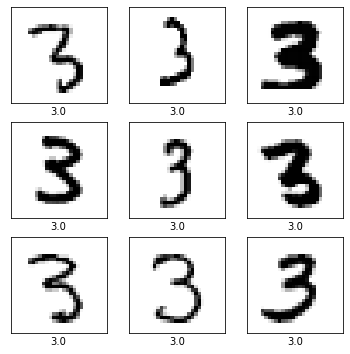

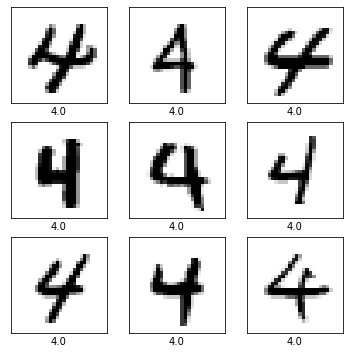

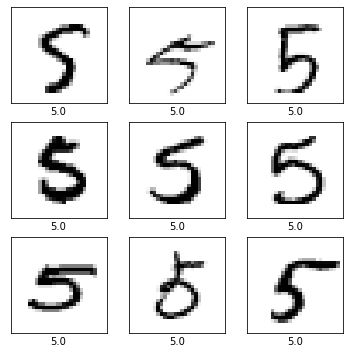

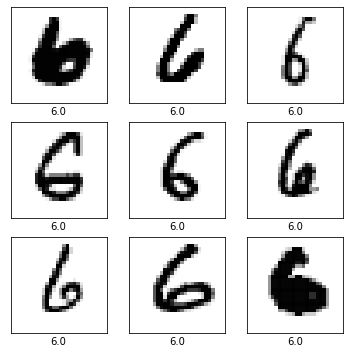

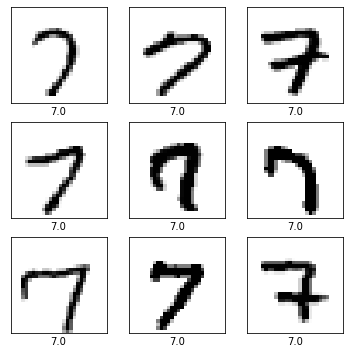

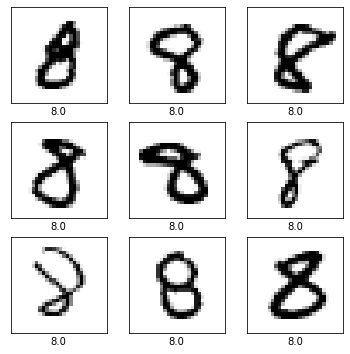

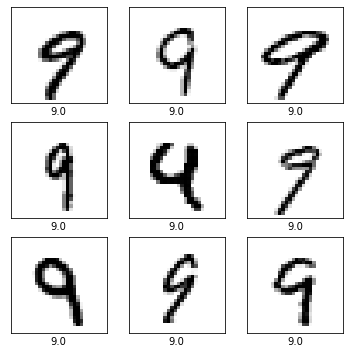

In [10]:
# Muestra cada elemento
for n in range(10):
    df_n = df[df.iloc[:,-1] == n].sample(frac=1)
    plot(df_n, size=3)

### 2.c División del conjunto 
Divida el conjunto de datos en Entrenamiento (50%), Calibración (20%) y Prueba (30%).

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, shuffle=True)
train, calibration = train_test_split(train, train_size=0.5/0.7, shuffle=True)
# Aunque MNIST ya tiene los últimos 10000 para test, nosotros necesitamos más, por eso el shuffle=True

In [12]:
# Verificamos tamaños
total = len(df)
print("train: ", len(train) / total, len(train))
print("calibration: ", len(calibration) / total, len(calibration))
print("test: ", len(test) / total, len(test))

train:  0.5 35000
calibration:  0.2 14000
test:  0.3 21000


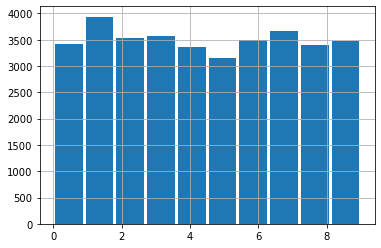

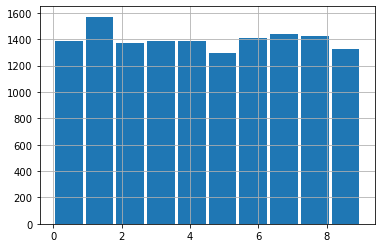

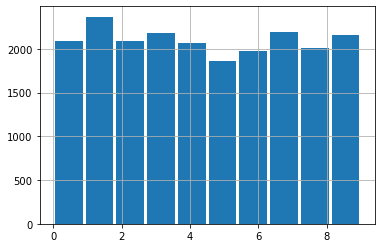

In [13]:
# Revisamos la distribución de las categorías en cada conjunto
for cjt in [train, calibration, test]:
    cjt.iloc[:,-1].hist(rwidth=0.9)
    plt.show()

In [14]:
# Preparamos un escalador de datos para manejar las intensidades de cada pixel entre 0 y 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = train.iloc[:, :-1]
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)
y = train.iloc[:,-1]

### 2.d Entrenamiento del modelo
Utilizando regresión logística, construya un clasificador para MNIST, 
para ello debe considerar un clasificador binario capaz de reconocer cada dígito.
Use el conjunto de entrenemiento para entrenar cada sub-clasificador.

In [15]:
from sklearn.linear_model import LogisticRegression
classes = sorted(set(labels))
models = list()
for c in classes:
    print("Training for", int(c),"...")
    yn = (y == c)
    models.append(LogisticRegression(solver="liblinear", max_iter=5000))
    model = models[-1]
    model.fit(X_scaled, yn)
print("Finished")

Training for 0 ...
Training for 1 ...
Training for 2 ...
Training for 3 ...
Training for 4 ...
Training for 5 ...
Training for 6 ...
Training for 7 ...
Training for 8 ...
Training for 9 ...
Finished


In [16]:
# Predicciones para el conjunto de calibración para la matríz de confunsión
# Y predicción probabilistica para calculo de roc y recall-precision
X_calibration = scaler.transform(calibration.iloc[:,:-1])
y_calibration = calibration.iloc[:, -1]
y_preds = list()
y_scores = list()
for idx, c in enumerate(classes):
    model = models[idx]
    y_preds.append(model.predict(X_calibration))
    y_scores.append(model.predict_proba(X_calibration)[:,-1])

### 2.e Ajuste del modelo

#### 2.e.1. Matríz de confusión
Calcule una matriz de confusión usando los datos de calibración.

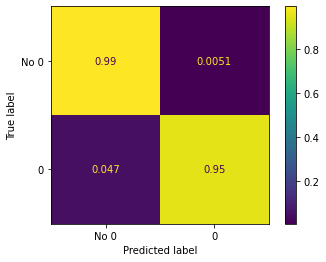

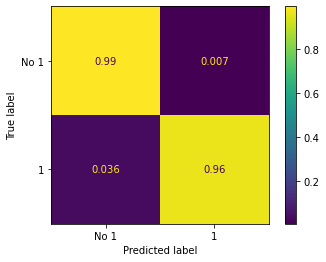

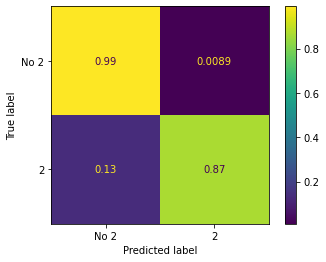

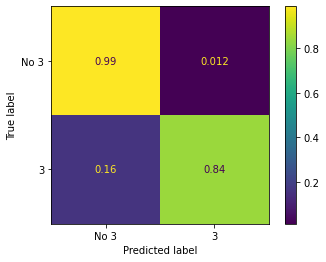

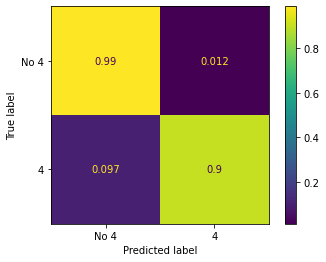

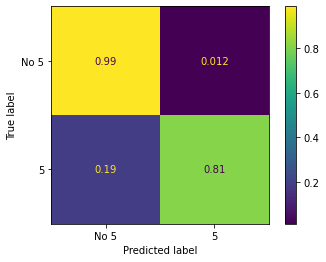

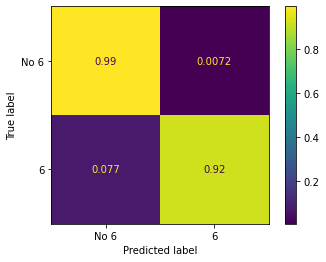

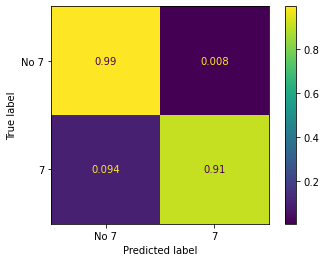

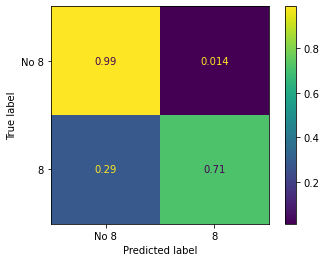

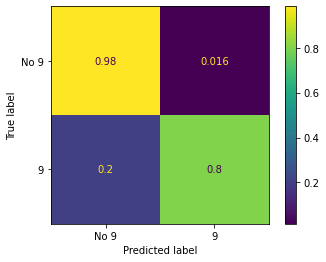

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for c in classes:
    clase = int(c)
    disp = ConfusionMatrixDisplay.from_predictions((y_calibration == c), y_preds[clase], display_labels=("No %d"%c, "%d"%c), normalize="true")

In [18]:
# Funciones para obtener un threshold que minimice el FPR y maximice el TPR usando una curva ROC
from math import sqrt

def distance(p, q):
    return sqrt( (q[0] - p[0])**2 + (q[1] - p[1])**2 )

def getBalancedThreshold(fpr, tpr, thresholds):
    best = (0,0)
    one = (0,1)
    bestDistance = distance(best, one)
    for p in zip(fpr,tpr):
        new_distance = distance(p, one)
        if new_distance < bestDistance:
            best = p
            bestDistance = new_distance
    best_idx = np.where(fpr == best[0])[0][0]
    return best_idx, thresholds[best_idx]

#### 2.e.3,4 Curva ROC y obtención de threshold
Grafique una curva ROC mostrando el compromiso entre TPR y FPR 
para cada valor del umbral (al menos 100 valores).

2.e.4. Obtenga el valor del umbral que simultáneamente maximice la TPR y minimice la FPR.

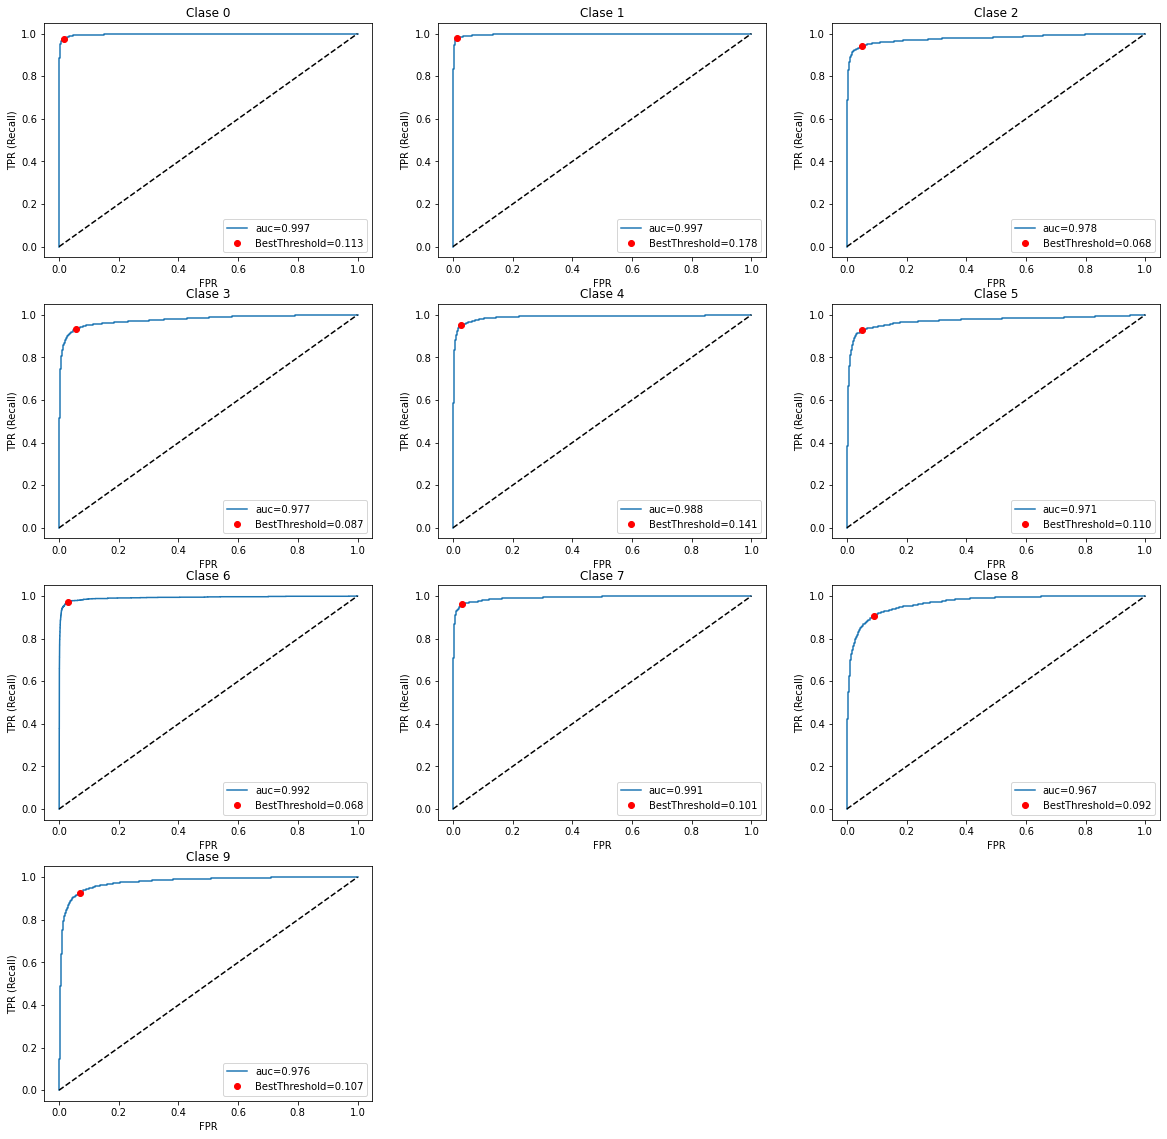

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(20,25))
best_thresholds = list()
for c in classes:
    clase = int(c)
    fpr, tpr, thresholds = roc_curve((y_calibration == clase), y_scores[clase])
    best_idx, threshold = getBalancedThreshold(fpr,tpr,thresholds)
    best_thresholds.append((best_idx,threshold))
    auc = roc_auc_score((y_calibration == clase), y_scores[clase])
    plt.subplot(5,3,clase+1)
    plt.plot(fpr, tpr, label="auc=%0.3f"%auc)
    plt.plot([0,1], [0,1], "k--")
    plt.plot(fpr[best_idx], tpr[best_idx], 'ro', label="BestThreshold=%0.3f"%threshold)
    plt.title("Clase " + str(clase))
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.legend()
plt.show()

In [20]:
# Calculamos los valores para graficar la grafica de precision vs recall
from sklearn.metrics import precision_recall_curve
precisions = list()
recalls = list()
thresholds = list()
for c in classes:
    p, r, t = precision_recall_curve((y_calibration == c), y_scores[int(c)])
    precisions.append(p)
    recalls.append(r)
    thresholds.append(t)

#### 2.e.2. Precision vs Recall
A partir de la matriz de confunsión, grafique en un solo panel 
las curvas de Precisión y Recall en función del umbral (al menos 100 valores).

También se incluye el mejor threshold calculado en el incido 2.e.3

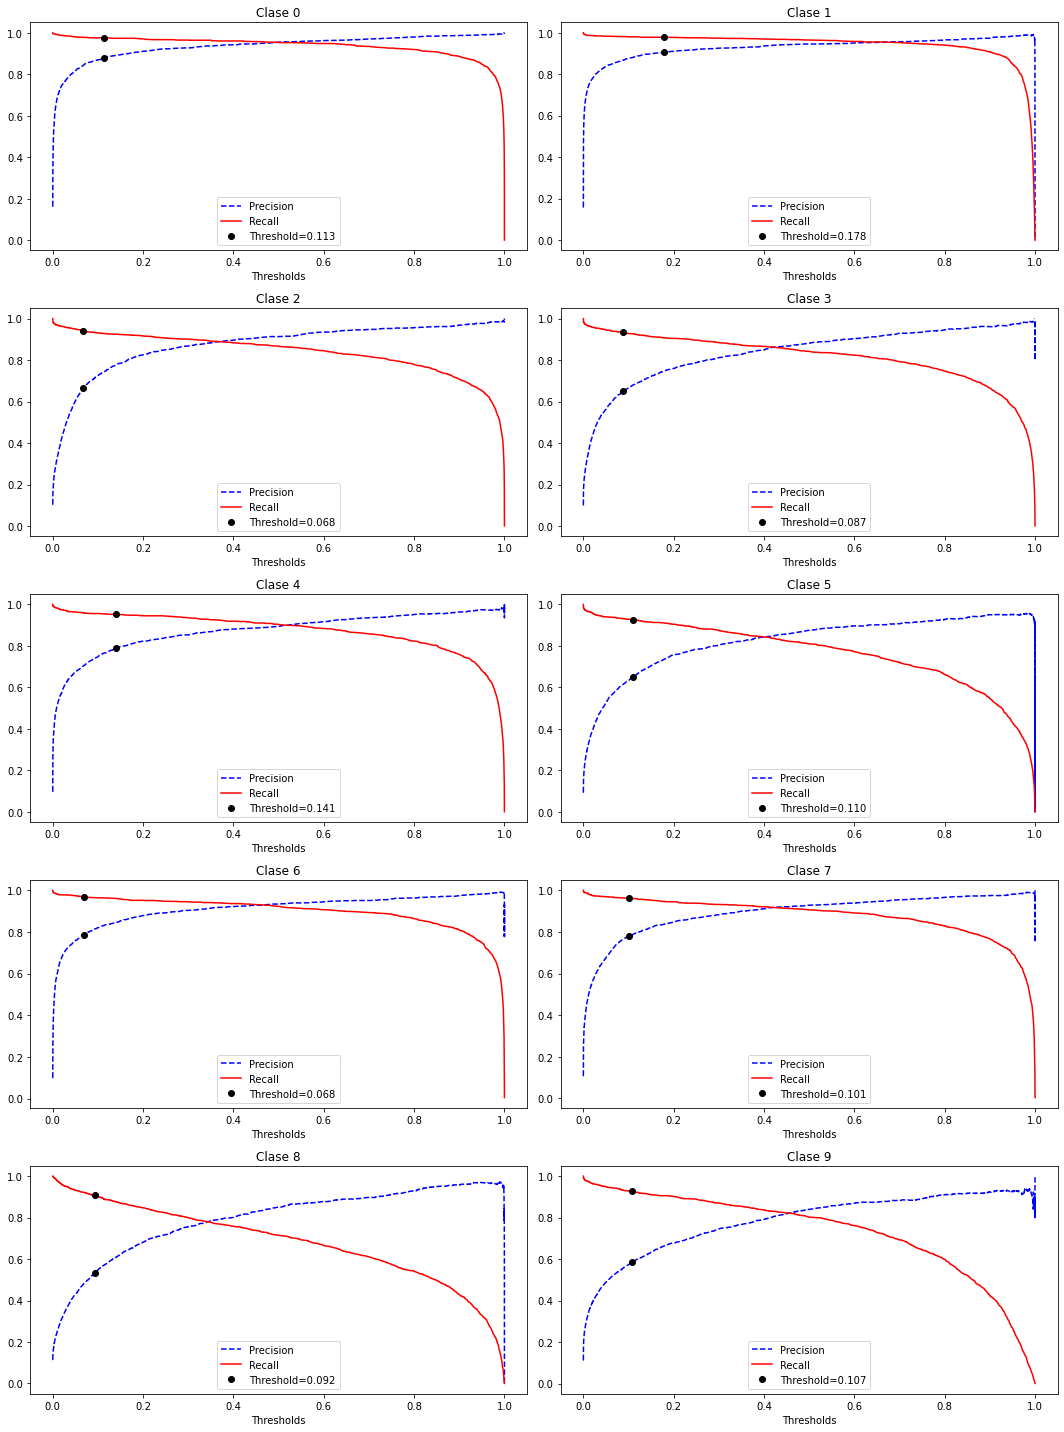

In [21]:
plt.figure(figsize=(15,20))
for c in classes:
    clase = int(c)
    plt.subplot(5,2,clase+1)
    plt.tight_layout()
    plt.plot(thresholds[clase], precisions[clase][:-1], "b--", label="Precision")
    plt.plot(thresholds[clase], recalls[clase][:-1], "r-", label="Recall")
    
    
    idx = best_thresholds[clase][1]
    t = thresholds[clase]
    idx = t[t >= idx][0]
    idx = np.where(t == idx)[0][0]
    plt.plot(thresholds[clase][idx], precisions[clase][idx], "ko", label="Threshold=%0.3f"%t[idx])
    plt.plot(thresholds[clase][idx], recalls[clase][idx], "ko")
    
    
    plt.legend()
    plt.title("Clase {}".format(clase))
    plt.xlabel("Thresholds")
plt.show()

### 2.f Modelo final

In [22]:
#
# Unificamos los modelos para tener uno solo
# 
best_thresholds = np.array(best_thresholds)
def predict_final(X):
    thresholds = best_thresholds[:, 1]
    predicts_proba = list()
    for model in models:
        predicts_proba.append(model.predict_proba(X))
    predicts_proba = np.array(predicts_proba)
    
    predicts = list()
    for idx, x in enumerate(X):
        predicts_proba_x = predicts_proba[:, idx, 1]
        candidates = predicts_proba_x >= thresholds
        posibles = len(candidates[candidates == True])
        if posibles < 1:
            candidates = np.array([True]*10)
        predicts.append(getBest(predicts_proba_x, thresholds, candidates))
    predicts = np.array(predicts)    
    return predicts

In [23]:
# Función para decidir cuando hay más de una clase que rebasa el threshold o
# ninguna lo rebasa
def getBest(A, B, ids):
    delta = np.absolute(A - B)
    best = 1
    best_id = -1
    for idx, d in enumerate(delta):
        if ids[idx] and d < best:
            best = d
            best_id = idx
    
    return best_id

In [24]:
# Preparamos el conjunto Test
X_test = scaler.transform(test.iloc[:,:-1])
y_test = test.iloc[:, -1]

predicts = predict_final(X_test)

#### 2.f.1 Matríz de confusión
Obtenga la matriz de confusión final para el clasificador MNIST considerando las 10 clases.

<Figure size 360x360 with 0 Axes>

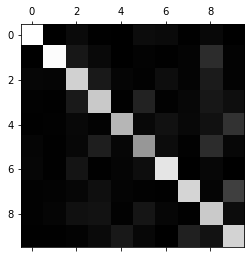

In [25]:
# Matriz dećonfusión final del sistema
# No usé la clase ConfusionMatrixDisplay porque se veía muy pequeño todo
cm = confusion_matrix(y_test, predicts)
plt.figure(figsize=(5,5))
plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

#### 2.f.2 Métricas finales
Calcule las métricas Micro-F1, Macro-F1, Weighted F1 y Average Accuracy del sistema.

In [26]:
# Métricas finales
from sklearn.metrics import classification_report, f1_score
print("Micro-F1:", f1_score(y_test, predicts, average="micro"))
print("Macro-F1:", f1_score(y_test, predicts, average="macro"))
print("Weighted-F1:", f1_score(y_test, predicts, average="weighted"))
print("Report:\n", classification_report(y_test, predicts))

Micro-F1: 0.6909047619047619
Macro-F1: 0.6927290286971596
Weighted-F1: 0.6951142617445275
Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      2086
         1.0       0.91      0.73      0.81      2368
         2.0       0.63      0.69      0.66      2090
         3.0       0.63      0.64      0.63      2181
         4.0       0.78      0.61      0.68      2066
         5.0       0.59      0.56      0.57      1865
         6.0       0.78      0.80      0.79      1981
         7.0       0.77      0.67      0.71      2195
         8.0       0.50      0.69      0.58      2007
         9.0       0.58      0.68      0.62      2161

    accuracy                           0.69     21000
   macro avg       0.70      0.69      0.69     21000
weighted avg       0.71      0.69      0.70     21000

